In [335]:

#Faiza's initial cleanup code implemented again
import os
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from pathlib import Path
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn import metrics

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sb
from sklearn.linear_model import LinearRegression

filename_read = '/Users/Faiza/Clean_Dataset.csv'
df =pd.read_csv(filename_read)


df.head()

print(df)

        Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           

In [336]:
#Checking for null values in airline
df['airline'].isnull().sum()

#Checking for null values in source city
df['source_city'].isnull().sum()

#Checking for null values in departure time
df['departure_time'].isnull().sum()

#Checking for null values in stops
df['stops'].isnull().sum()

#Checking for null values in arrival_time
df['arrival_time'].isnull().sum()

#Checking for null values in destination city
df['destination_city'].isnull().sum()

#Checking for null values in class
df['class'].isnull().sum()

#Checking for null values in duration
df['duration'].isnull().sum()

#Checking for null values in days left
df['days_left'].isnull().sum()

#Checking for null values in price
df['price'].isnull().sum()

#Checking overall and asking for sum of null values
df.isnull().values.all().sum()

# Dropping Flight column
df.drop('flight', 1, inplace=True)

# Changing price to Pounds
df["price"] = (df["price"]*0.011).round(2)

# Printinf dataset
print(df)


        Unnamed: 0   airline source_city departure_time stops   arrival_time  \
0                0  SpiceJet       Delhi        Evening  zero          Night   
1                1  SpiceJet       Delhi  Early_Morning  zero        Morning   
2                2   AirAsia       Delhi  Early_Morning  zero  Early_Morning   
3                3   Vistara       Delhi        Morning  zero      Afternoon   
4                4   Vistara       Delhi        Morning  zero        Morning   
...            ...       ...         ...            ...   ...            ...   
300148      300148   Vistara     Chennai        Morning   one        Evening   
300149      300149   Vistara     Chennai      Afternoon   one          Night   
300150      300150   Vistara     Chennai  Early_Morning   one          Night   
300151      300151   Vistara     Chennai  Early_Morning   one        Evening   
300152      300152   Vistara     Chennai        Morning   one        Evening   

       destination_city     class  dura

/var/folders/rb/3ckfjfm525j2f2s5dq_8x9t00000gp/T/ipykernel_93215/496689744.py:35: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('flight', 1, inplace=True)


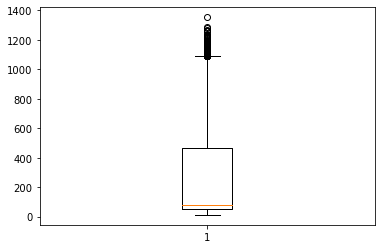

Unnamed: 0          False
airline             False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool


In [337]:
#Valli's code - further cleanup of the data (feature engineering)

plt.boxplot(df['price'])
plt.show()

print(df.isnull().any())

In [338]:
#creates a new column in the dataframe named 'price outlier'
df['price_outlier'] = 0

#to find the mean and standard deviation of the price values to work out the outlier
price_mean = np.mean(df['price'])
print(price_mean)
price_std = np.std(df['price'])
print(price_std)

#calculation to assign 0 or 1 to the price values (0 if the datapoint is not an outlier & 1 if it is)
df.loc[abs(df['price'] - price_mean) > 2 * price_std,'price_outlier'] = 1

#This counts the number of unique outlier values
print(Counter(df['price_outlier']))

df = df[df.price_outlier != 1]
print (df.shape)

#Creating a new column logging the price column to be used in ML models

#df['log_price'] = np.log(df['price'])

df.drop('price_outlier', 1, inplace=True)


229.7860992893624
249.67505500334724
Counter({0: 289222, 1: 10931})
(289222, 12)


/var/folders/rb/3ckfjfm525j2f2s5dq_8x9t00000gp/T/ipykernel_93215/152457145.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('price_outlier', 1, inplace=True)
/var/folders/rb/3ckfjfm525j2f2s5dq_8x9t00000gp/T/ipykernel_93215/152457145.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('price_outlier', 1, inplace=True)


In [339]:

le = LabelEncoder()
df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])


# Find unique values within the stops column
print(list(set(df['stops'])))

# Match and replace the numerical values in text with integers
df['stops'] = df['stops'].replace(["zero", "one", "two_or_more"], [0, 1, 2])

print(df.head())

/var/folders/rb/3ckfjfm525j2f2s5dq_8x9t00000gp/T/ipykernel_93215/3278705563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline'] = le.fit_transform(df['airline'])
/var/folders/rb/3ckfjfm525j2f2s5dq_8x9t00000gp/T/ipykernel_93215/3278705563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source_city'] = le.fit_transform(df['source_city'])
/var/folders/rb/3ckfjfm525j2f2s5dq_8x9t00000gp/T/ipykernel_93215/3278705563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

['one', 'zero', 'two_or_more']
   Unnamed: 0  airline  source_city  departure_time  stops  arrival_time  \
0           0        4            2               2      0             5   
1           1        4            2               1      0             4   
2           2        0            2               1      0             1   
3           3        5            2               4      0             0   
4           4        5            2               4      0             4   

   destination_city  class  duration  days_left  price  
0                 5      1      2.17          1  65.48  
1                 5      1      2.33          1  65.48  
2                 5      1      2.17          1  65.52  
3                 5      1      2.25          1  65.50  
4                 5      1      2.33          1  65.50  


/var/folders/rb/3ckfjfm525j2f2s5dq_8x9t00000gp/T/ipykernel_93215/3278705563.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stops'] = df['stops'].replace(["zero", "one", "two_or_more"], [0, 1, 2])


In [340]:
result = []

for x in df.columns:
    if x != 'price':
        result.append(x)


X = df[result].values        #by learning simple decision rules inferred from the data features (the X)
y = df['price'].values    #target variable (our Y value)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

decision_tree = DecisionTreeRegressor(criterion='friedman_mse',splitter='random')
decision_tree.fit(X_train,y_train)
print(decision_tree)



(202455, 10)
(86767, 10)
(202455,)
(86767,)
DecisionTreeRegressor(criterion='friedman_mse', splitter='random')


In [341]:
y_pred = decision_tree.predict(X_test)

df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare.head(25)



,Actual,Predicted
0,56.99,44.42
1,497.83,497.83
2,22.55,37.28
3,71.52,71.52
4,664.36,664.36
5,79.74,79.74
6,22.55,22.55
7,665.59,665.59
8,52.76,52.76
9,351.80,351.80


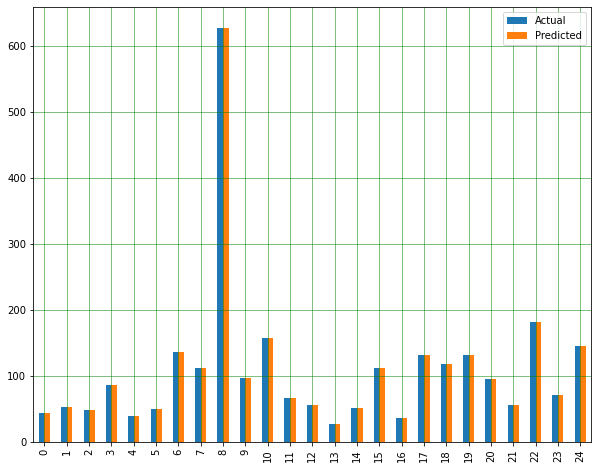

Mean: 207.13919381792616
Root Mean Squared Error: 26.743940348885875


In [342]:
df_head.plot(kind = 'bar', figsize = (10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean:', np.mean(y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

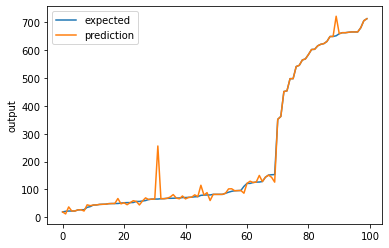

In [343]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
chart_regression(y_pred[:100].flatten(),y_test[:100],sort=True)  



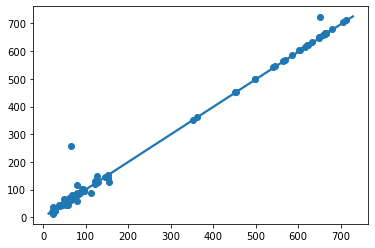

In [344]:
plt.scatter(y_test[:100], y_pred[:100])
#plt.plot(y_pred, y_test, color = 'green')


sb.regplot(x= y_test, y= y_pred, scatter = False)

plt.show()


In [345]:
# Use 5-fold split
kf = KFold(5,shuffle=True)

fold = 1

for train_index, validate_index in kf.split(X,y):
    decision_tree.fit(X[train_index],y[train_index])
    y_test = y[validate_index]
    y_pred = decision_tree.predict(X[validate_index])
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
    
    fold += 1

Root Mean Squared Error: 26.300520266216452
Fold #1, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 25.899033614288243
Fold #2, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 26.51543860945585
Fold #3, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 26.151225158931236
Fold #4, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 26.26021584313821
Fold #5, Training Size: 231378, Validation Size: 57844


In [346]:
# Use 5-fold split
kf = KFold(10,shuffle=True)

fold = 1

for train_index, validate_index in kf.split(X,y):
    decision_tree.fit(X[train_index],y[train_index])
    y_test = y[validate_index]
    y_pred = decision_tree.predict(X[validate_index])
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
    
    fold += 1

Root Mean Squared Error: 25.591797229931704
Fold #1, Training Size: 260299, Validation Size: 28923
Root Mean Squared Error: 26.214552724313965
Fold #2, Training Size: 260299, Validation Size: 28923
Root Mean Squared Error: 25.230335003750817
Fold #3, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 26.188201933510786
Fold #4, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 25.972465812437964
Fold #5, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 26.108335823401944
Fold #6, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 24.892422315401603
Fold #7, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 24.894754681097883
Fold #8, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 25.208176875938815
Fold #9, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 24.25617087314093
Fold #10, Training Size: 260300, Validation Size: 28922
